<h1> Length of Stay NICU </h1>

This notebook was used to analyze the LoS for NICU patients in the dataset and obtain the ridge regression coefficients. If running with the example data, it should run into an error at the correlation matrices.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#seaborn settings
sns.set_theme(style="whitegrid",palette="colorblind",font_scale=1.5)
sns.set_context("paper")
sns.despine(left=True,right=True)
#deactivate warnings
import warnings
warnings.filterwarnings('ignore')
#import smf
import statsmodels.api as sm
import statsmodels.formula.api as smf

<Figure size 640x480 with 0 Axes>

In [29]:
df = pd.read_csv("example_dataset.csv")

In [30]:
#filter out ward_level unknown
df = df[df["ward_level"] != "unknown"]

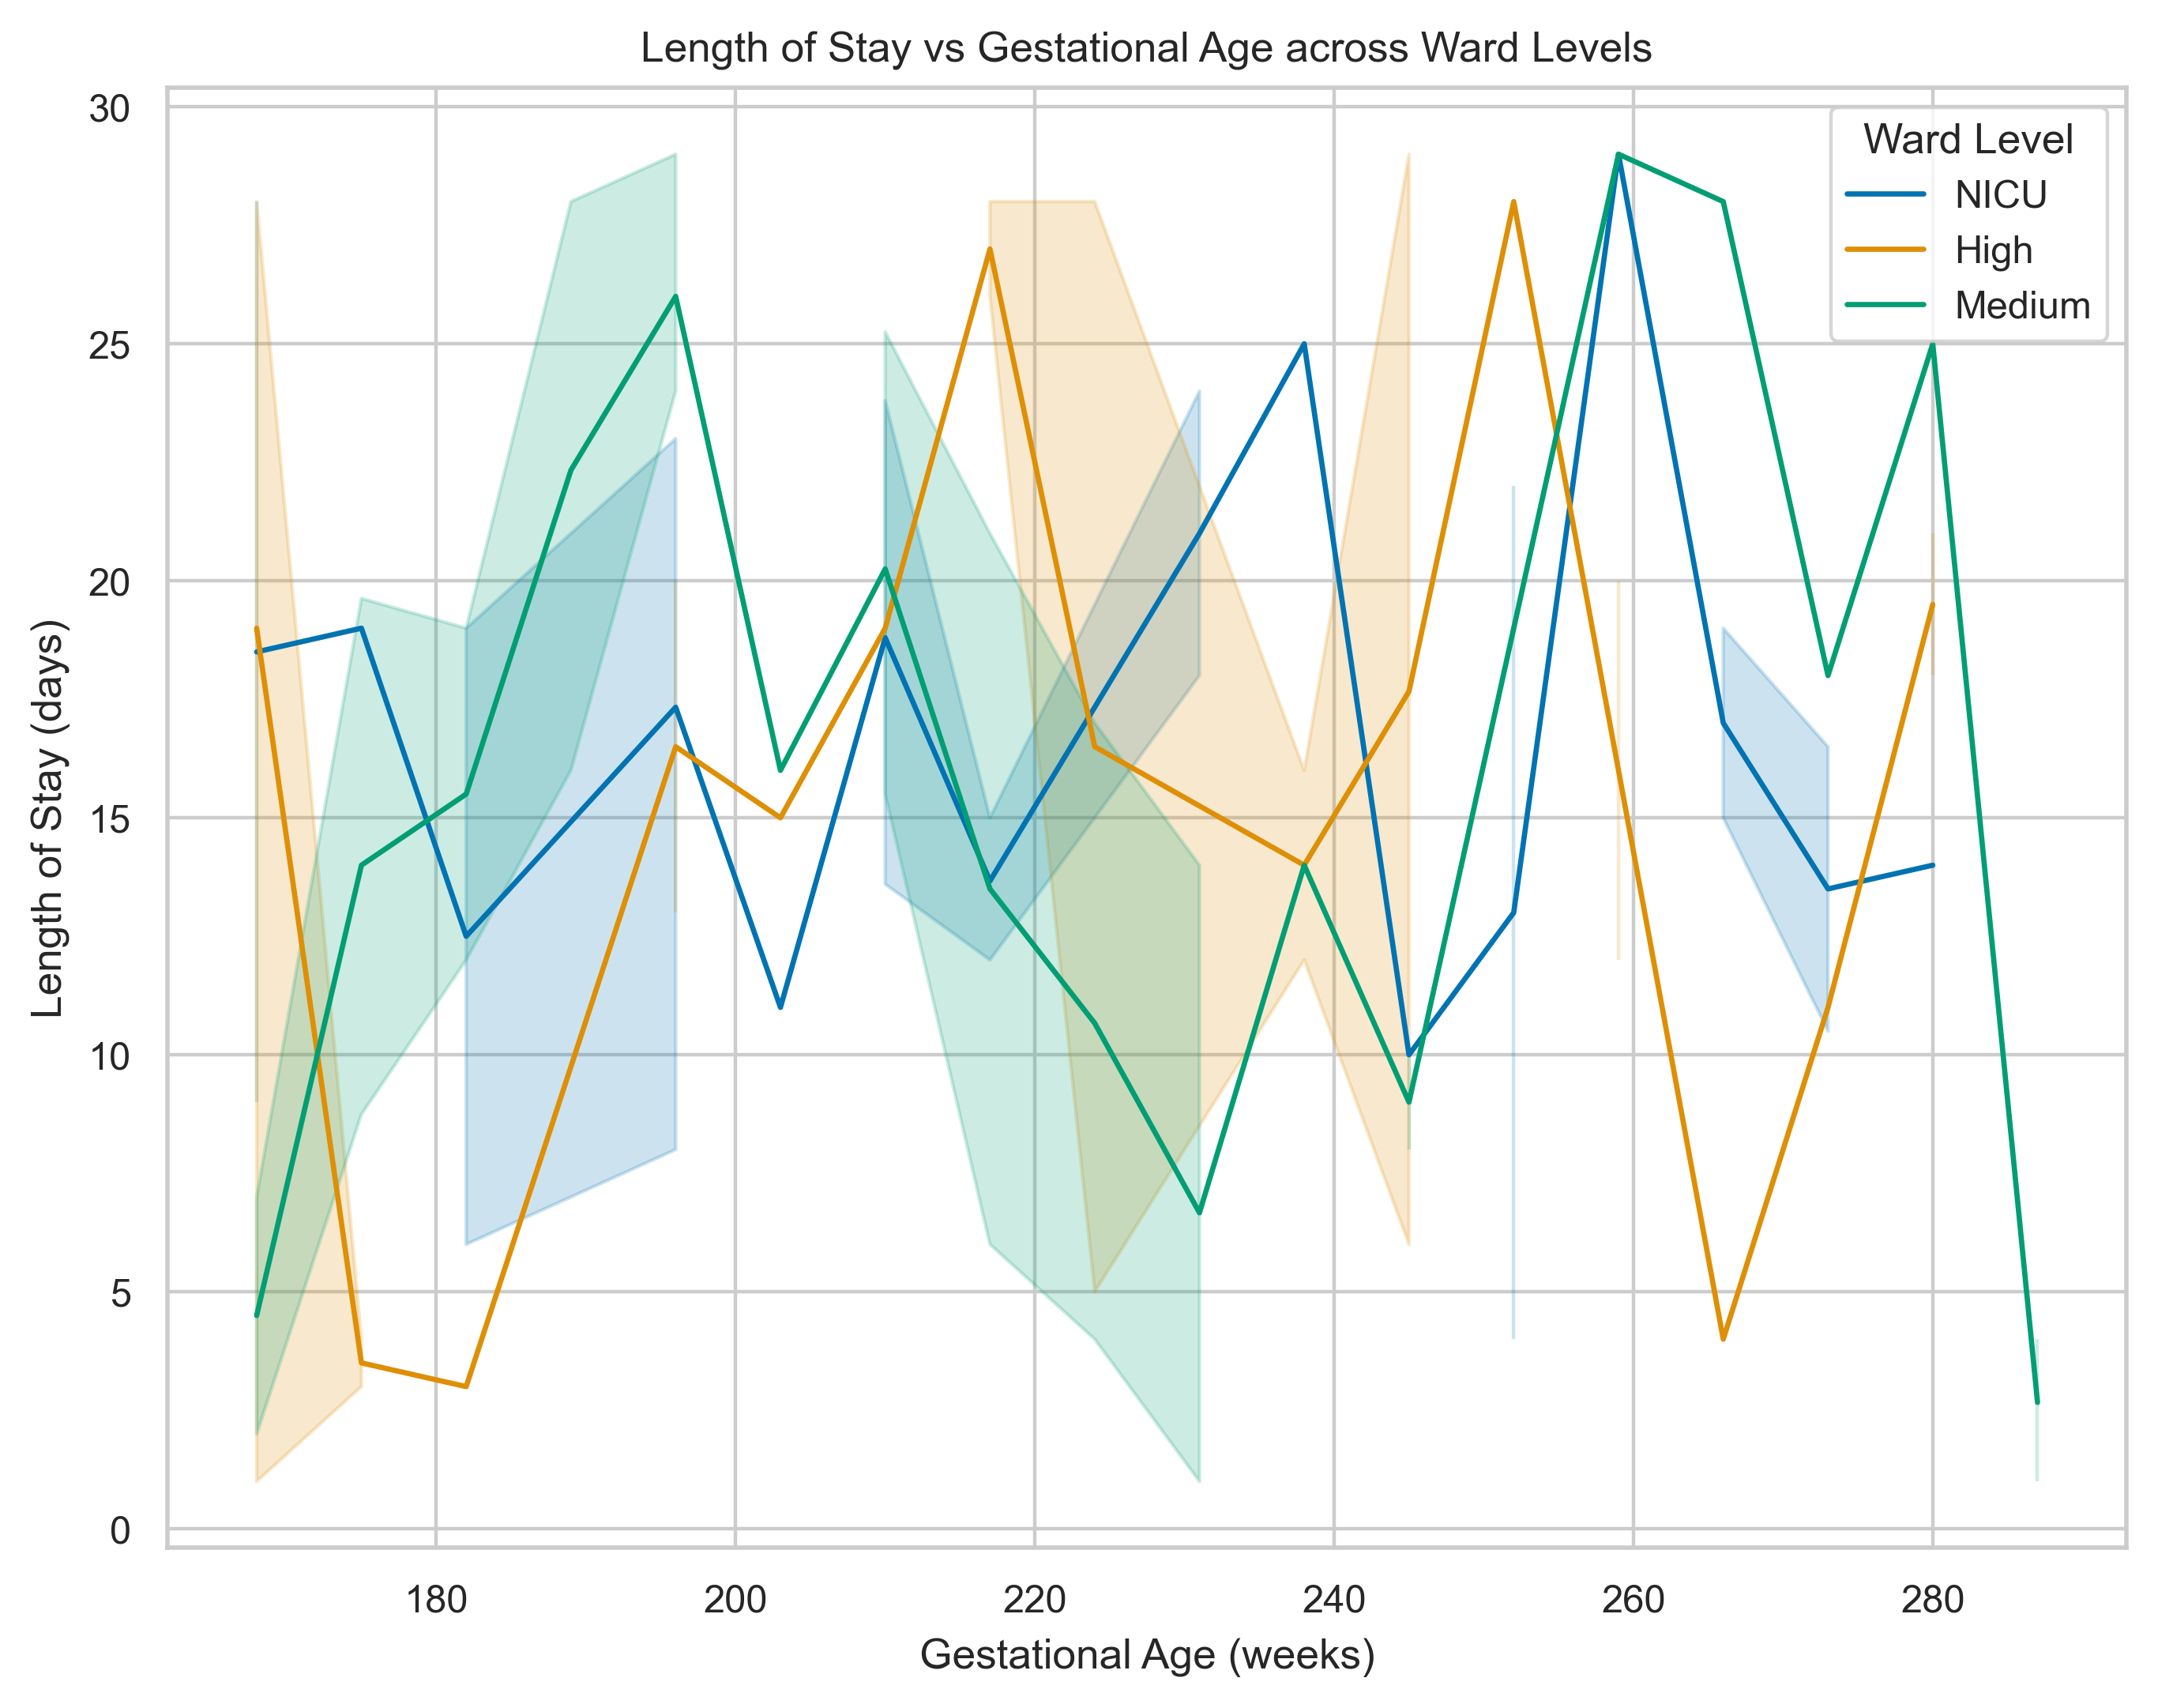

In [31]:
ward_order = ['NICU', 'High', 'Medium']
df['ward_level'] = pd.Categorical(df['ward_level'], categories=ward_order, ordered=True)
df = df.sort_values(by=['ward_level'])
 
plt.figure(figsize=(8, 6), dpi=400)
 
# Plot the scatterplot
sns.lineplot(data=df, y='length_of_stay', x='gestational_age', hue='ward_level', hue_order=ward_order)
 
# Set x and y labels
plt.xlabel("Gestational Age (weeks)")
plt.ylabel("Length of Stay (days)")
 
# Set title
plt.title("Length of Stay vs Gestational Age across Ward Levels")
 
# Modify legend
plt.legend(title='Ward Level')
 
# Show plot
plt.show()

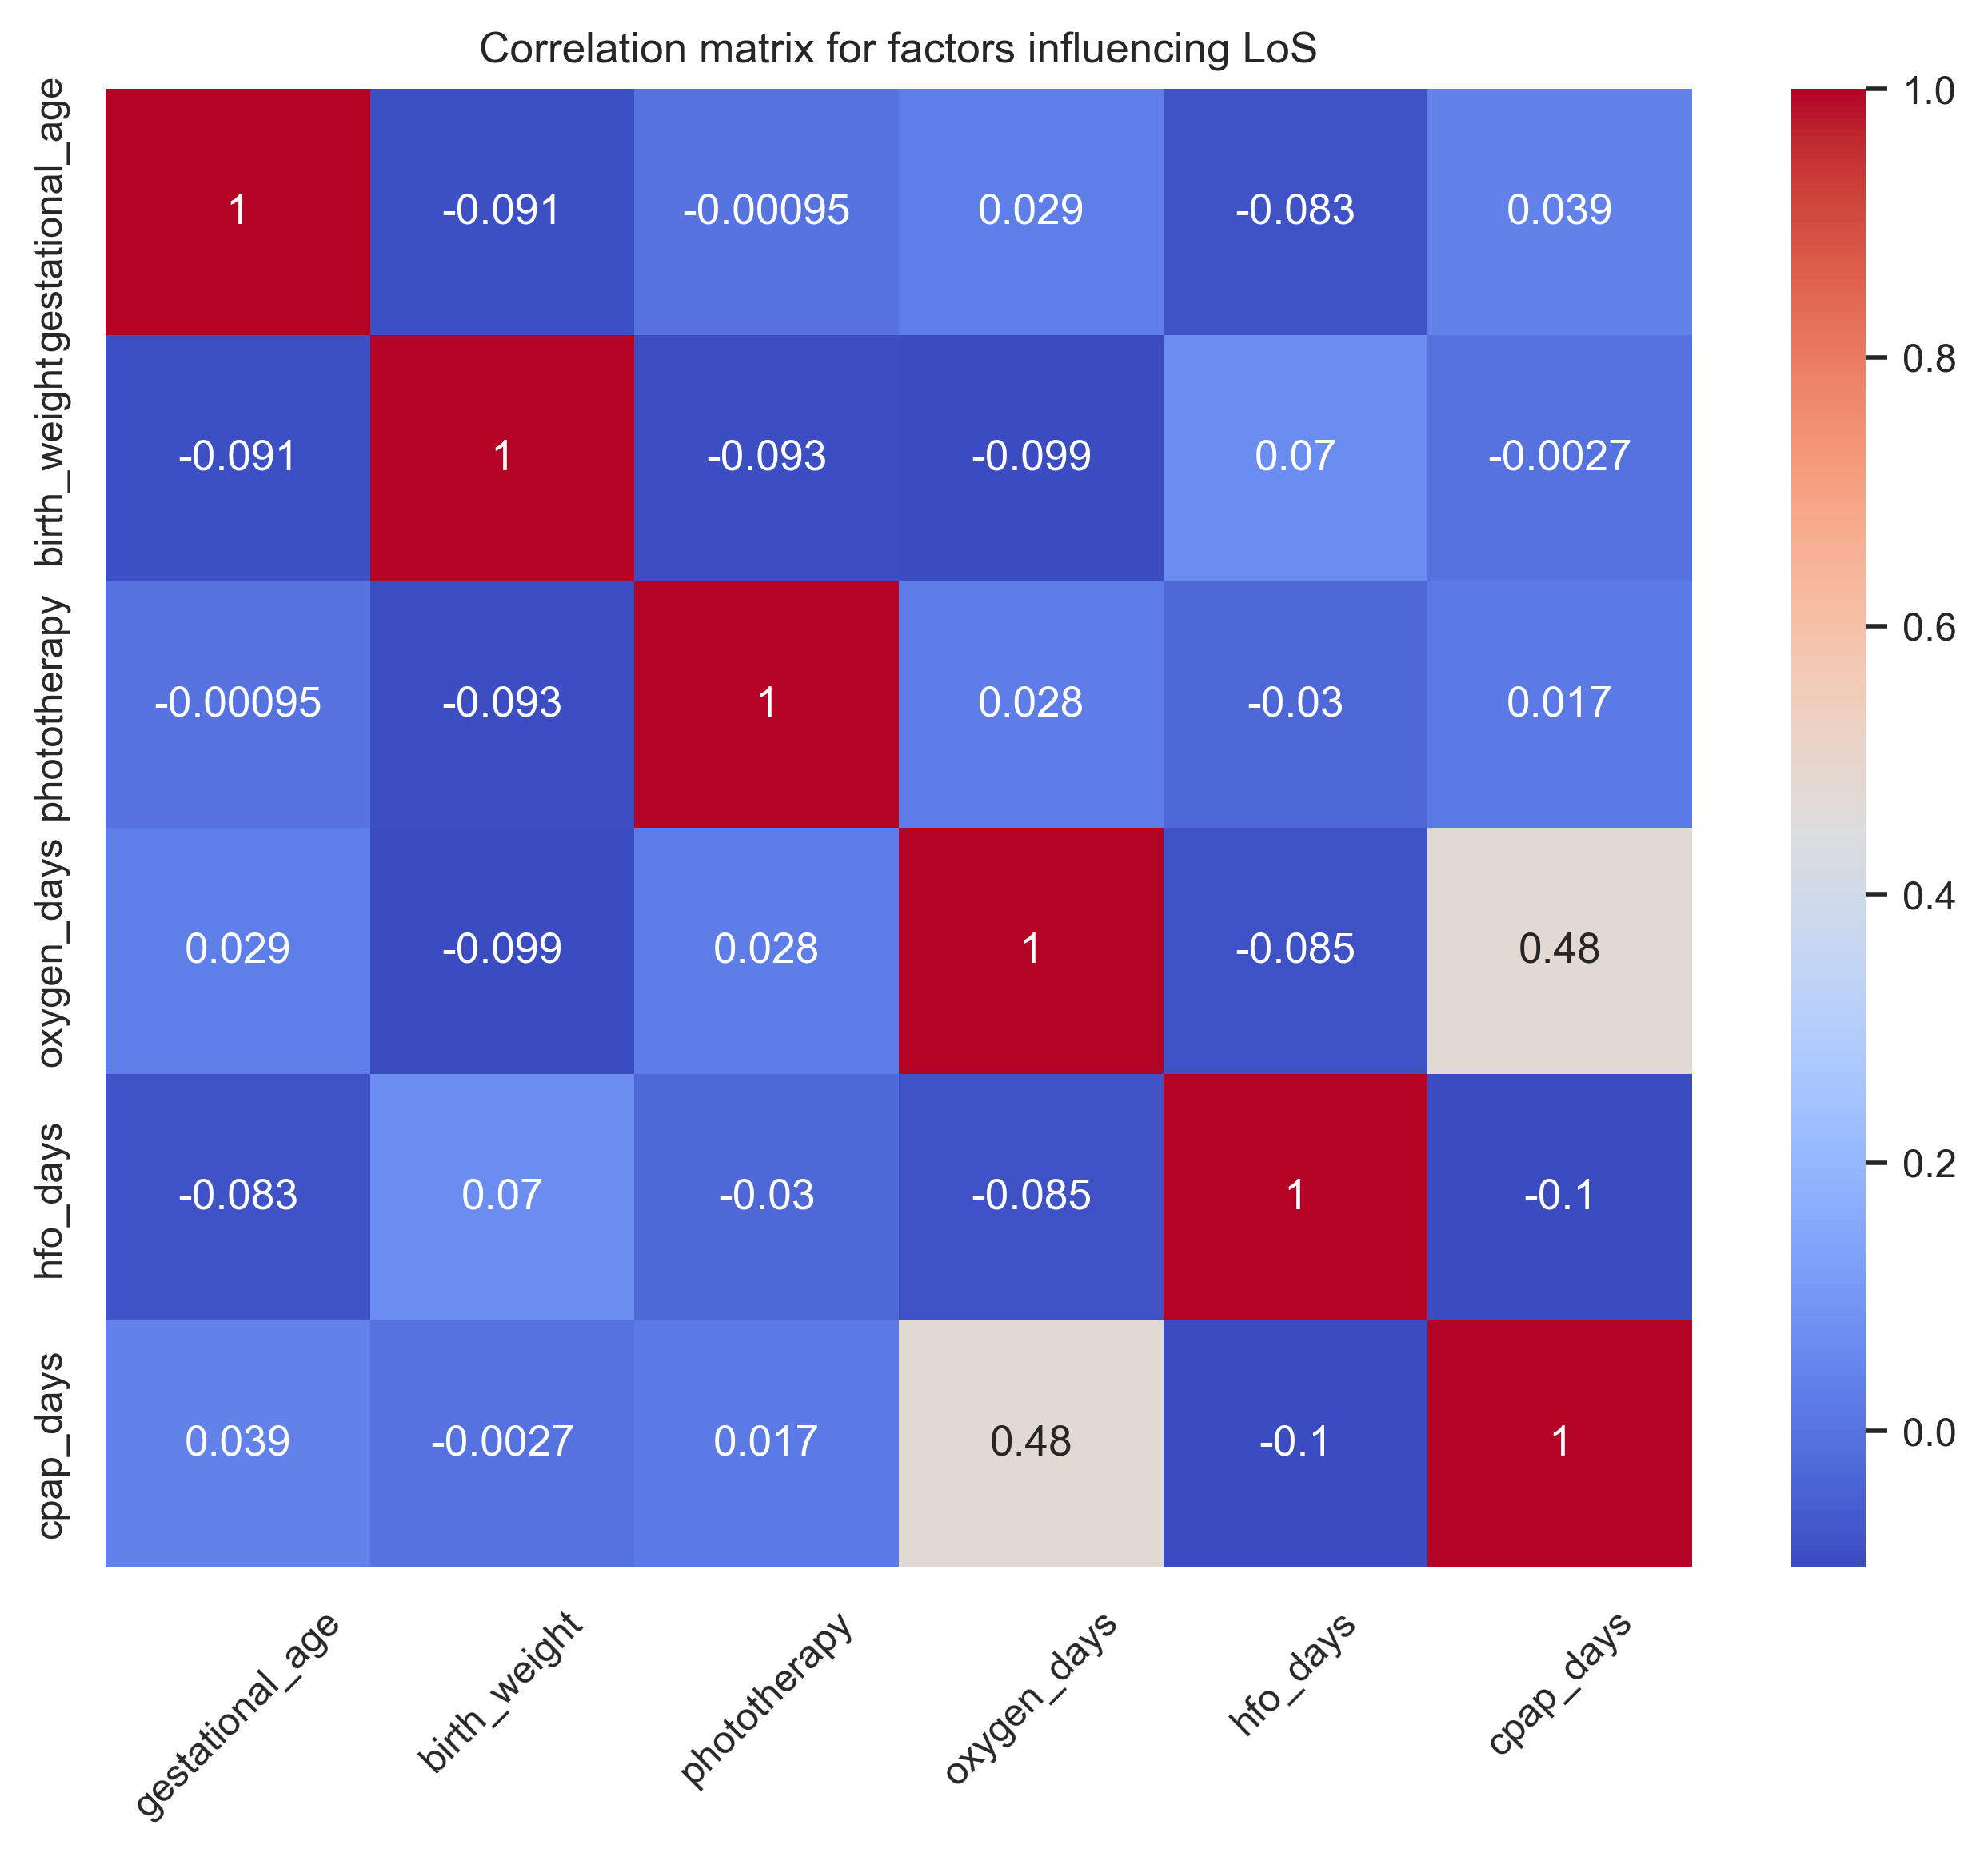

In [32]:
#correlation for 
df_filtered_corr = df.drop(columns=["ward","ward_level"])
#criteria only gestational_age, n_opnduur,n_hyperbilli,n_02dg,cpap,conv_hfo
criteria = ["gestational_age",'birth_weight',"phototherapy",'oxygen_days','hfo_days','cpap_days']
#remove ward and ward level from criteria
criteria = [c for c in criteria if c not in ["ward","ward_level"]]

corr_matrix = df_filtered_corr[criteria].corr()

plt.figure(figsize=(8,6),dpi=400)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
#rotate x labels
plt.xticks(rotation=45)
plt.title('Correlation matrix for factors influencing LoS')
plt.show()

In [33]:
df[df["ward_level"]=="nicu"].sort_values(by="length_of_stay",ascending=False).head(30)

,patient_id,number_of_children,sex,birth_weight,hoftiezer,nicu_admission,stay_number,start_date,end_date,hospital_id,length_of_stay,thrombocytopenia_treatment,antibiotics_treatment,hypothermia,antenatal_steroids_treatment,phototherapy,polycythemia_treatment,sepsis_treatment,anemia_treatment,oxygen_days,hfo_days,cpap_days,gestational_age_indicator,birth_weight_indicator,cardiovascular_indicator,jaundice_indicator,hypoglycemia_indicator,infection_indicator,asphyxia_indicator,seizure_indicator,feeding_indicator,congenital_abnormality_indicator,withdrawal_indicator,maternal_medication_indicator,psycho_indicator,postIC_indicator,others_indicator,region,hospital,ward,ward_level,c_section,season,month,year,gestational_age


In [34]:
df_ward = df[df["ward_level"]=="nicu"]

In [35]:
#show all columns
pd.set_option('display.max_columns', None)

In [36]:
#show 5 largest length_of_stay
df_ward.sort_values(by="length_of_stay",ascending=False).head(5)


,patient_id,number_of_children,sex,birth_weight,hoftiezer,nicu_admission,stay_number,start_date,end_date,hospital_id,length_of_stay,thrombocytopenia_treatment,antibiotics_treatment,hypothermia,antenatal_steroids_treatment,phototherapy,polycythemia_treatment,sepsis_treatment,anemia_treatment,oxygen_days,hfo_days,cpap_days,gestational_age_indicator,birth_weight_indicator,cardiovascular_indicator,jaundice_indicator,hypoglycemia_indicator,infection_indicator,asphyxia_indicator,seizure_indicator,feeding_indicator,congenital_abnormality_indicator,withdrawal_indicator,maternal_medication_indicator,psycho_indicator,postIC_indicator,others_indicator,region,hospital,ward,ward_level,c_section,season,month,year,gestational_age


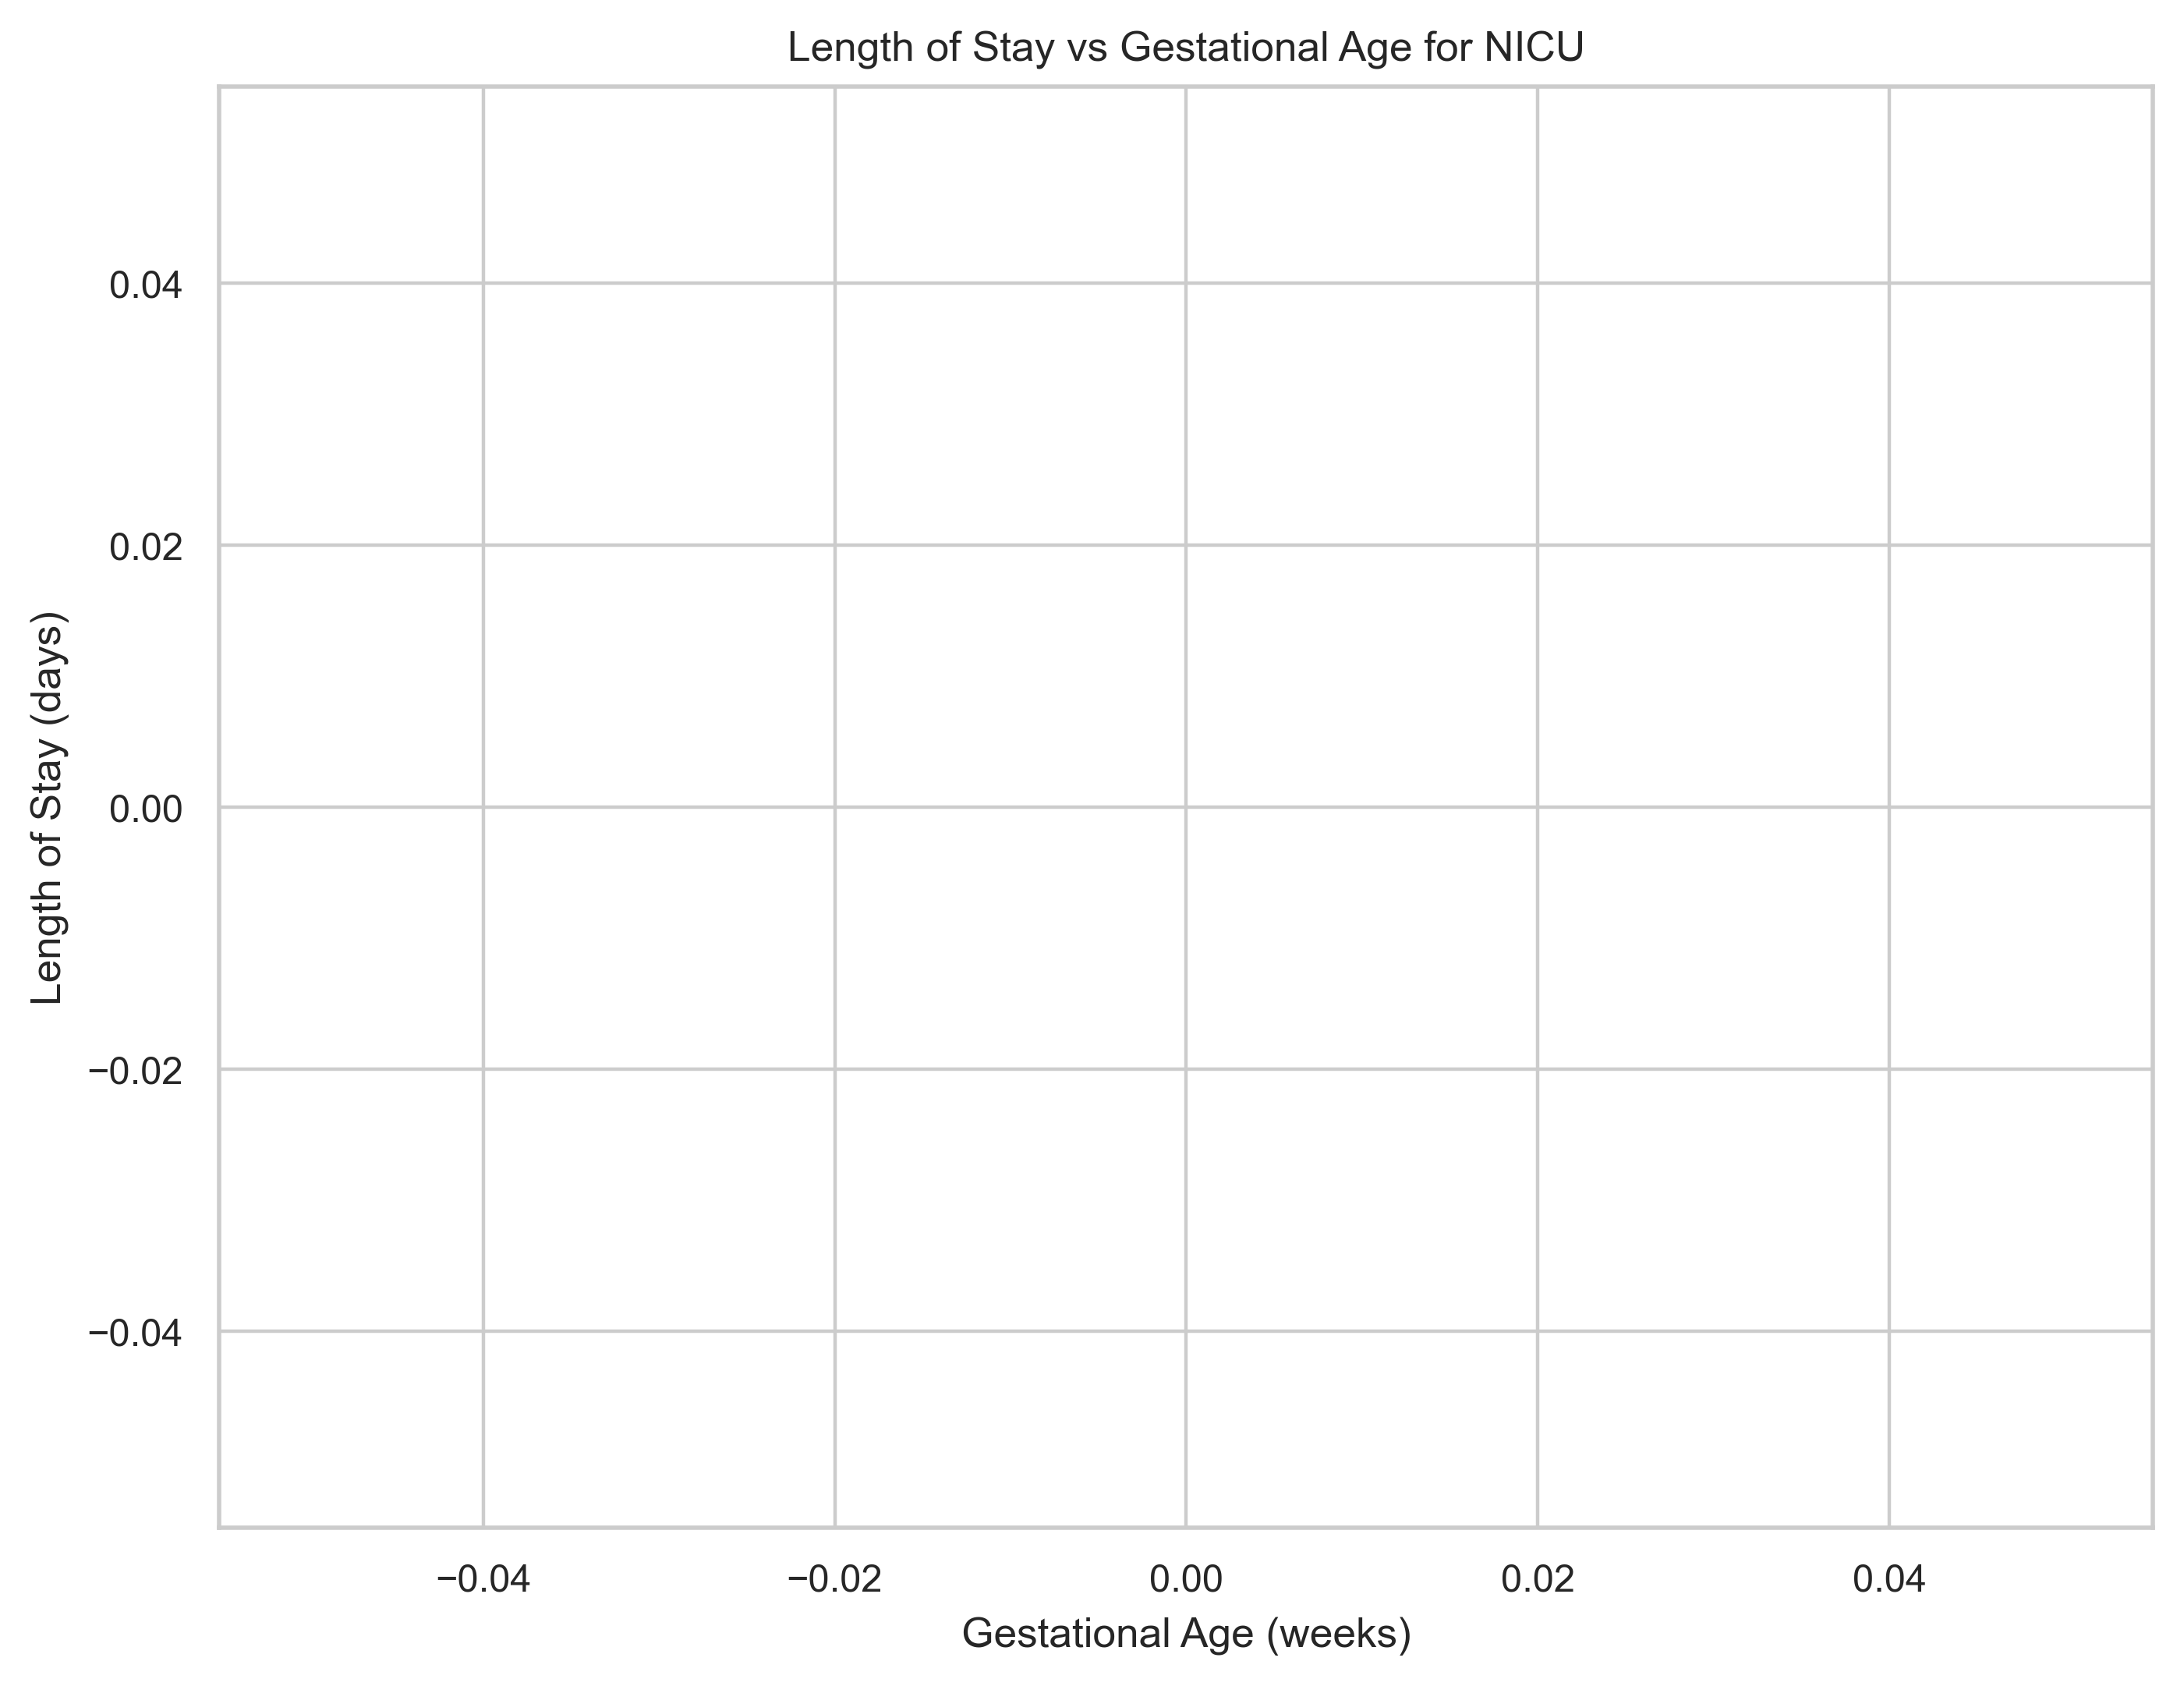

In [37]:
plt.figure(figsize=(8, 6), dpi=400)
 
# Plot the scatterplot
sns.lineplot(data=df_ward, y='length_of_stay', x='gestational_age')
 
# Set x and y labels
plt.xlabel("Gestational Age (weeks)")
plt.ylabel("Length of Stay (days)")
 
# Set title
plt.title("Length of Stay vs Gestational Age for NICU")
 

 
# Show plot
plt.show()

In [38]:
#show highest o2 values
df_ward.sort_values(by="length_of_stay",ascending=False).head(30)

,patient_id,number_of_children,sex,birth_weight,hoftiezer,nicu_admission,stay_number,start_date,end_date,hospital_id,length_of_stay,thrombocytopenia_treatment,antibiotics_treatment,hypothermia,antenatal_steroids_treatment,phototherapy,polycythemia_treatment,sepsis_treatment,anemia_treatment,oxygen_days,hfo_days,cpap_days,gestational_age_indicator,birth_weight_indicator,cardiovascular_indicator,jaundice_indicator,hypoglycemia_indicator,infection_indicator,asphyxia_indicator,seizure_indicator,feeding_indicator,congenital_abnormality_indicator,withdrawal_indicator,maternal_medication_indicator,psycho_indicator,postIC_indicator,others_indicator,region,hospital,ward,ward_level,c_section,season,month,year,gestational_age


In [39]:
relevant_criteria = [

 'number_of_children',
 'gestational_age',
 'gestational_age',
 'sex',
 'birth_weight',
 'c_section',

 'stay_number',


 'length_of_stay',
 'thrombocytopenia_treatment',
 'antibiotics_treatment',
 'hypothermia',
 
 'antenatal_steroids_treatment',
 'phototherapy',
 'polycythemia_treatment',
 'sepsis_treatment',
 'anemia_treatment',
 'oxygen_days',
 'hfo_days',
 'cpap_days',
 'gestational_age_indicator',
 'birth_weight_indicator',
 'cardiovascular_indicator',
 'jaundice_indicator',
 'hypoglycemia_indicator',
 'infection_indicator',
 'asphyxia_indicator',
 'seizure_indicator',
 'feeding_indicator',
 'congenital_abnormality_indicator',
 'withdrawal_indicator',
 'maternal_medication_indicator',
 'psycho_indicator',
 'postIC_indicator',
 'others_indicator',
 
 

 
 'month',
 'ward',
    'ward_level',



]
admission_criteria = ['gestational_age_indicator',
 'birth_weight_indicator',
 'cardiovascular_indicator',
 'jaundice_indicator',
 'hypoglycemia_indicator',
 'infection_indicator',
 'asphyxia_indicator',
 'seizure_indicator',
 'feeding_indicator',
 'congenital_abnormality_indicator',
 'withdrawal_indicator',
 'maternal_medication_indicator',
 'psycho_indicator',
 'postIC_indicator',
 'others_indicator'
]

In [40]:
df_filtered = df_ward[relevant_criteria]

                                  length_of_stay
number_of_children                           NaN
gestational_age                              NaN
gestational_age                              NaN
sex                                          NaN
birth_weight                                 NaN
c_section                                    NaN
stay_number                                  NaN
length_of_stay                               NaN
thrombocytopenia_treatment                   NaN
antibiotics_treatment                        NaN
hypothermia                                  NaN
antenatal_steroids_treatment                 NaN
phototherapy                                 NaN
polycythemia_treatment                       NaN
sepsis_treatment                             NaN
anemia_treatment                             NaN
oxygen_days                                  NaN
hfo_days                                     NaN
cpap_days                                    NaN
gestational_age_indi

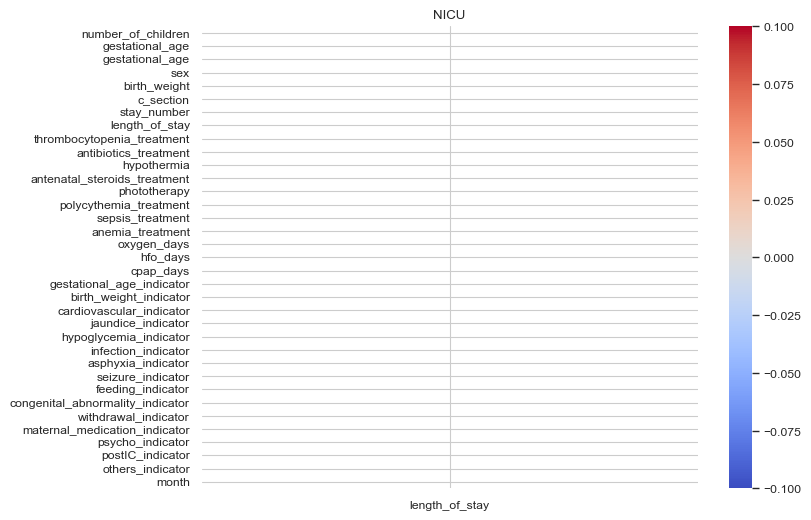

In [41]:

    
#drop ward
df_filtered_corr = df_filtered.drop(columns=["ward","ward_level"])

corr_matrix = df_filtered_corr.corr()[['length_of_stay']]
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('NICU')
plt.show()

In [42]:
#describe length of stay
df_filtered['length_of_stay'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: length_of_stay, dtype: float64

In [43]:
gestational_age_cut = 224
#drop ward

for i in range(0,2):
    df_filtered_corr = df_filtered.drop(columns=["ward","ward_level",'gestational_age','stay_number','month'])
    #filter for gestational age
    if i == 0:
        df_filtered_corr = df_filtered_corr[df_filtered_corr["gestational_age"]<=gestational_age_cut]
    else:
        df_filtered_corr = df_filtered_corr[df_filtered_corr["gestational_age"]>gestational_age_cut]
    print("Gestational age cut:",gestational_age_cut, i)
    corr_matrix = df_filtered_corr.corr()[['length_of_stay']]
    print(corr_matrix)
    plt.figure(figsize=(8,6),dpi=400)
    sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
    plt.title('NICU')
    plt.show()

KeyError: 'gestational_age'

<h3>Ridge Regression </h3>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#import r2_score
from sklearn.metrics import r2_score


In [ ]:
ward = "nicu"
gestational_age_cut = 224
x_criteria = []

x_criteria_1 = ["gestational_age",'birth_weight','phototherapy','anemia_treatment','cpap_days','oxygen_days','hfo_days','thrombocytopenia_treatment','antibiotics_treatment']

x_criteria_2 = ["gestational_age",'birth_weight','anemia_treatment','oxygen_days','cpap_days','hfo_days']
#set ln of n_opnduur


model_1 = Ridge(alpha=1,solver='auto',fit_intercept=True)
#filter only gestational_age > 220
df_filtered_1 = df_filtered[df_filtered["gestational_age"] > gestational_age_cut]
X = df_filtered_1[x_criteria_1]

y = df_filtered_1['length_of_stay']
model_1.fit(X,y)

df_filtered.loc[df_filtered['gestational_age'] > gestational_age_cut, 'predicted_los'] = (model_1.predict(X))
print(r2_score(y,model_1.predict(X)))
print(mean_squared_error(y,model_1.predict(X)))
#intercept
print("intercept: ",model_1.intercept_)
#coefficents with names and p values
coefficients = pd.DataFrame(model_1.coef_,index=x_criteria_1,columns=['coefficients'])
print(coefficients)
df_filtered_2 = df_filtered[df_filtered["gestational_age"] <= gestational_age_cut]
X = df_filtered_2[x_criteria_2]

y = df_filtered_2['length_of_stay']
model_2 = Ridge(alpha=1,solver='auto',fit_intercept=True)
model_2.fit(X,y)
df_filtered.loc[df_filtered['gestational_age'] <= gestational_age_cut, 'predicted_los'] = (model_2.predict(X))
mask = df_filtered['predicted_los'] < df_filtered[['oxygen_days', 'hfo_days', 'cpap_days']].max(axis=1)

# Use the mask to select rows and assign the maximum value to 'n_opnduur'
df_filtered.loc[mask, 'predicted_los'] = df_filtered.loc[mask, ['oxygen_days', 'hfo_days', 'cpap_days']].max(axis=1)
df_filtered['predicted_los'] = df_filtered['predicted_los'].astype(int)
df_filtered.loc[df_filtered['predicted_los'] == 0, 'predicted_los'] = 1
print(r2_score(y,df_filtered.loc[df_filtered['gestational_age'] <= gestational_age_cut, 'predicted_los']))
print(mean_squared_error(y,df_filtered.loc[df_filtered['gestational_age'] <= gestational_age_cut, 'predicted_los']))
print(model_2.intercept_)
coefficients = pd.DataFrame(model_2.coef_,index=x_criteria_2,columns=['coefficients'])
print(coefficients)

plt.figure(figsize=(8,6),dpi=400)
#title
plt.title('Actual vs Predicted LoS for NICU')
sns.lineplot(data=df_filtered,x='gestational_age',y='predicted_los',label='Predicted LoS')
sns.lineplot(data=df_filtered,x='gestational_age',y='length_of_stay',label='Actual LoS')
print(r2_score(df_filtered['length_of_stay'],df_filtered['predicted_los']))
#set y as LoS
plt.ylabel("LoS (days)")
plt.xlabel("gestational age (weeks)")
plt.legend()
plt.show()


In [ ]:
# If 'n_opnduur' is smaller than 'n_o2dg', 'n_dag_conv_hfo', or 'n_dag_hhhfnc_cpap_nippv', 
# set 'n_opnduur' to the highest of the three

# Create a mask for rows where 'n_opnduur' is smaller than the maximum of the other three columns
mask = df_filtered['predicted_los'] < df_filtered[['oxygen_days', 'hfo_days', 'cpap_days']].max(axis=1)

# Use the mask to select rows and assign the maximum value to 'n_opnduur'
df_filtered.loc[mask, 'predicted_los'] = df_filtered.loc[mask, ['oxygen_days', 'hfo_days', 'cpap_days']].max(axis=1)


In [ ]:
# set predicted as int
df_filtered['predicted_los'] = df_filtered['predicted_los'].astype(int)

In [ ]:
#if predicted 0 then set to 1
df_filtered.loc[df_filtered['predicted_los'] == 0, 'predicted_los'] = 1

In [ ]:
df_filtered["predicted_los"].astype(int).describe()

In [ ]:
print(r2_score(df_filtered["length_of_stay"],df_filtered["predicted_los"]))

In [ ]:
df_filtered[df_filtered["gestational_age"]<=224]["length_of_stay"].describe()

In [ ]:
#describe for below 220
df_filtered[df_filtered["gestational_age"]<=gestational_age_cut]["predicted_los"].describe()

In [ ]:
#describe for below 220
df_filtered[df_filtered["gestational_age"]>gestational_age_cut]["predicted_los"].describe()

In [ ]:
df_filtered[df_filtered["gestational_age"]>gestational_age_cut]["length_of_stay"].describe()

In [ ]:
#biggest difference between predicted and actual
df_filtered["diff"] = df_filtered["predicted_los"] - df_filtered["length_of_stay"]
df_filtered[df_filtered["gestational_age"]<=220]["diff"].describe()

In [ ]:
df_filtered[df_filtered["gestational_age"]>220]["diff"].describe()

In [ ]:
df_filtered[["length_of_stay",'predicted_los']].describe()